Importing required librarys

In [39]:
# Importing essential libraries
import numpy as np                    # for numerical operations
import pandas as pd                   # for data manipulation
import matplotlib.pyplot as plt       # for plotting graphs
import seaborn as sns                 # for advanced visualizations

# Machine Learning libraries
from sklearn.model_selection import train_test_split    # for splitting the dataset
from sklearn.linear_model import LogisticRegression     # for building the logistic regression model
from sklearn.metrics import accuracy_score              # for evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix # for visualizing model report


DATA COLLECTION

In [ ]:
# Load the dataset from a CSV file into a pandas DataFrame
dataset = pd.read_csv('Titanic_dataset.csv')

basic dataframe overview

In [41]:
# Display the first five rows of the dataset to understand the structure
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
# Display the number of rows and columns in the dataset
dataset.shape

(418, 12)

In [43]:
# Display concise summary including column data types and non-null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [44]:
# Check for missing values in each column
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Handling the missing values**

In [45]:
# Drop the 'Cabin' column due to high percentage of missing values
dataset = dataset.drop(columns = 'Cabin' , axis = 1)

In [46]:
# Replace missing values in the 'Age' column with the mean age
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())


In [47]:
# Identify the mode of the 'Fare' column for imputation
print(dataset['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [48]:
# Replace missing values in the 'Fare' column with the mode
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mode()[0])

In [49]:
# Confirm that all missing values have been handled
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Exploratory Data Analysis (EDA)**

In [50]:
# Display summary statistics of numerical columns
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [51]:
# Count of passengers who survived and did not survive
dataset['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [52]:
# Set Seaborn theme for better aesthetics
sns.set()

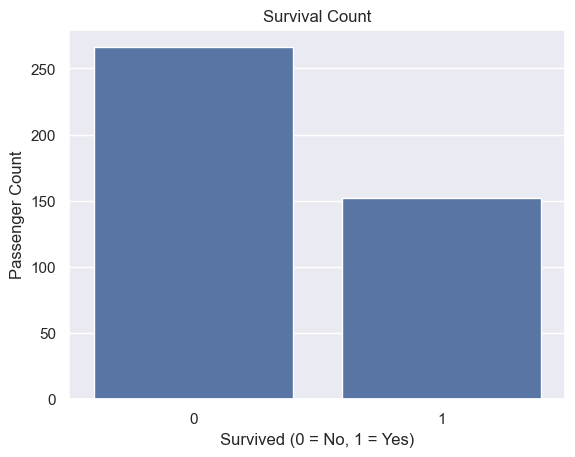

In [53]:
# visuallizing survival using count plot
sns.countplot(x ='Survived' , data = dataset)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()

In [54]:
# Check distribution of gender in the dataset
dataset['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

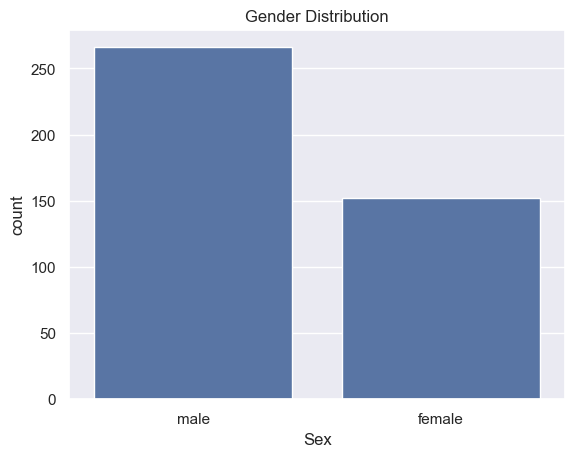

In [55]:
# Plot count of passengers by gender
sns.countplot(x ='Sex' , data = dataset)
plt.title('Gender Distribution')
plt.show()

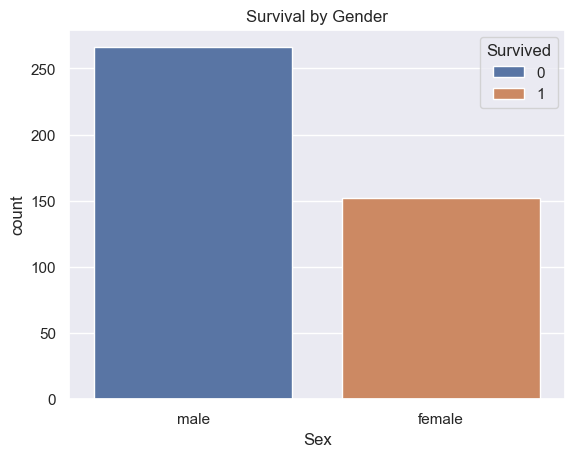

In [56]:
# Plot survival counts based on gender
sns.countplot(x = 'Sex' , hue = 'Survived' , data = dataset)
plt.title('Survival by Gender')
plt.show()

In [57]:
# Check distribution of passengers by ticket class
dataset['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

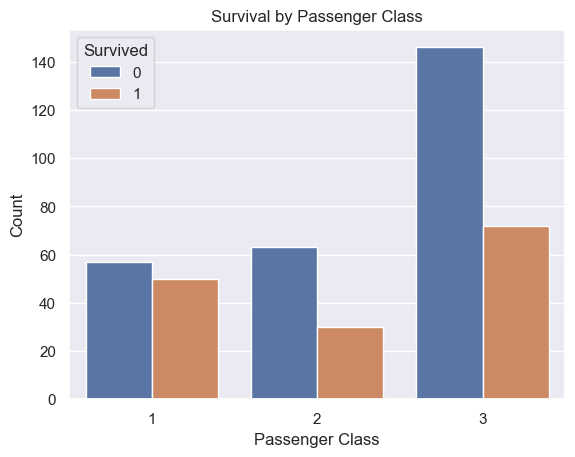

In [58]:
# Plot survival counts based on passenger class
sns.countplot(x='Pclass', hue='Survived', data=dataset)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

## Encoding Categorical Features


Machine learning models require all inputs to be numeric. In this section, we convert categorical columns such as 'Sex' and 'Embarked' into numerical format using label encoding.


In [59]:
# View unique values in 'Sex' column
dataset['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [60]:
# View unique values in 'Embarked' column
dataset['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [76]:
# Convert categorical variables to numerical using dictionary mapping
dataset['Sex'] = dataset['Sex'].replace({'male': 0, 'female': 1}).astype(int)
dataset['Embarked'] = dataset['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [62]:
# Preview the transformed dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


**Feature Selection**

We separate the features (independent variables) and the target (dependent variable — `Survived`). Irrelevant columns such as `PassengerId`, `Name`, and `Ticket` are dropped.


In [63]:
# Drop irrelevant columns and separate features and target
x = dataset.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = dataset['Survived']

In [64]:
# Display the features and target
print("Features:\n", x.head())
print("\nTarget:\n", y.head())

Features:
    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  34.5      0      0   7.8292         2
1       3    1  47.0      1      0   7.0000         0
2       2    0  62.0      0      0   9.6875         2
3       3    0  27.0      0      0   8.6625         0
4       3    1  22.0      1      1  12.2875         0

Target:
 0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64


Splitting the Dataset

In [65]:
# Splitting the data into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 2)

In [66]:
# Check the shape of the resulting datasets
print("Original dataset shape:", x.shape)
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Original dataset shape: (418, 7)
Training set shape: (334, 7)
Testing set shape: (84, 7)


**Model Training**

We will now train a Logistic Regression model using the training dataset.

In [67]:
# Initialize the Logistic Regression model
Model = LogisticRegression(max_iter=2000)

In [68]:
# Train the logistic regression model using training data
Model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


Model Evaluation

accuracy score

In [69]:
# accuracy on training data
x_train_prediction = Model.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)

In [70]:
print(x_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [71]:
print('Accuracy on training data : ' , training_data_accuracy)

Accuracy on training data :  1.0


In [72]:
# accuracy on test data
x_test_prediction = Model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [73]:
print(x_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [74]:
print('Accuracy on test data : ' , test_data_accuracy)


Accuracy on test data :  1.0


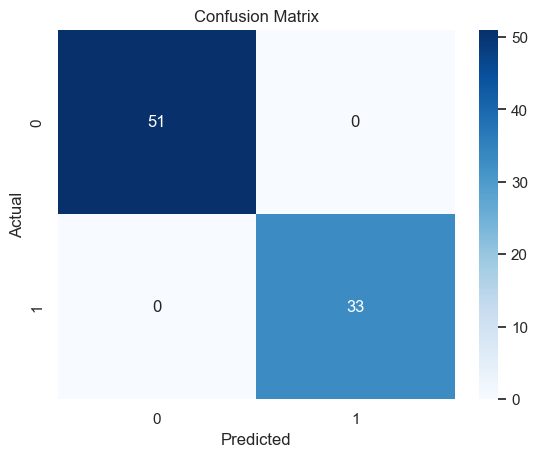

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [75]:


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, x_test_prediction)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, x_test_prediction))

## Conclusion

In this project, we built a logistic regression model to predict passenger survival from the Titanic dataset.

- We performed data cleaning and exploratory data analysis (EDA).
- Categorical features were encoded, and irrelevant features were removed.
- We trained the model using an 80/20 train-test split and achieved competitive accuracy.
- The confusion matrix and classification report showed that the model performs reasonably well, particularly in identifying survivors.
